This script is written to get atmospheric data (pressure, temperature, etc., as a function of altitude, from a local data file.  The data is then plotted, and fit with a user-defined function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

use_errors = True
fit_type = 1

Define a user funcion for fitting the data.

In [2]:
if fit_type == 1:
    def fitfunction(x,a,b):
        return a*np.exp(b*np.array(x))
else:
    def fitfunction(x,a,b,c):
        return a*np.exp(b*np.array(x)+c*np.power(np.array(x),1.5))

Define python arrays to store the data.

In [3]:
altitude = []
temp = []
gravity = []
pressure = []
density = []
viscosity = []

Read data from the filem and store in the above python arrays.

In [4]:
npoints = 0
with open('density.txt') as f:
    for line in f:
        npoints=npoints+1
        data = line.split()
        altitude.append(float(data[0]))
        temp.append(float(data[1]))
        gravity.append(float(data[2]))
        pressure.append(float(data[3]))
        density.append(float(data[4]))
        viscosity.append(float(data[5]))
        

In [5]:

if use_errors == True:
    # create a list to hold the uncertainty in the density  
    density_uncertainty = [0.01,0.01,0.01,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.0001,0.0001,0.0001,0.00001,0.00001,0.000001,0.0000001,0.0000001]
else:
    density_uncertainty = [0.0]*len(density)
    
density_uncertainty = np.array(density_uncertainty)

Text(0, 0.5, 'Density (kg/m^3)')

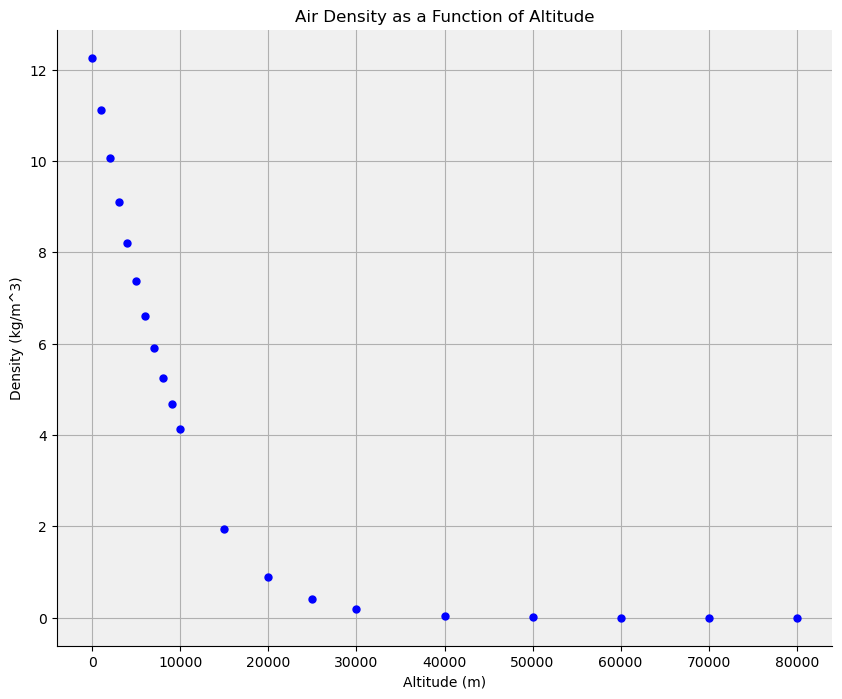

In [6]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
if use_errors == True:
    plt.errorbar(altitude, density, yerr=density_uncertainty, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)
else:
    plt.plot(altitude, density, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color)

# Set the plot title and axis labels
plt.title("Air Density as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Density (kg/m^3)")
#plt.yscale("log")

Fit the data with the pre-defined function

In [7]:
from scipy.optimize import curve_fit

if fit_type == 1:
    init_vals = [12.0,-0.0001]
else:
    init_vals = [12.0,-0.0001, -0.000001]

if use_errors == False:
    popt, pcov = curve_fit(fitfunction, altitude, density, p0=init_vals)
else:
    popt, pcov = curve_fit(fitfunction, altitude, density, sigma=density_uncertainty, absolute_sigma=True, p0=init_vals)

print (popt)
print (pcov)

[ 1.46580069e+01 -1.40646634e-04]
[[ 6.67398510e-07 -1.01154383e-12]
 [-1.01154383e-12  3.69796951e-18]]


In [8]:
yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(fitfunction(altitude[i],*popt))
    chi2 += (density[i]-yfit[i])*(density[i]-yfit[i])

print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

Chi^2 / dof = 1.083E+01 / 18


Draw the graph

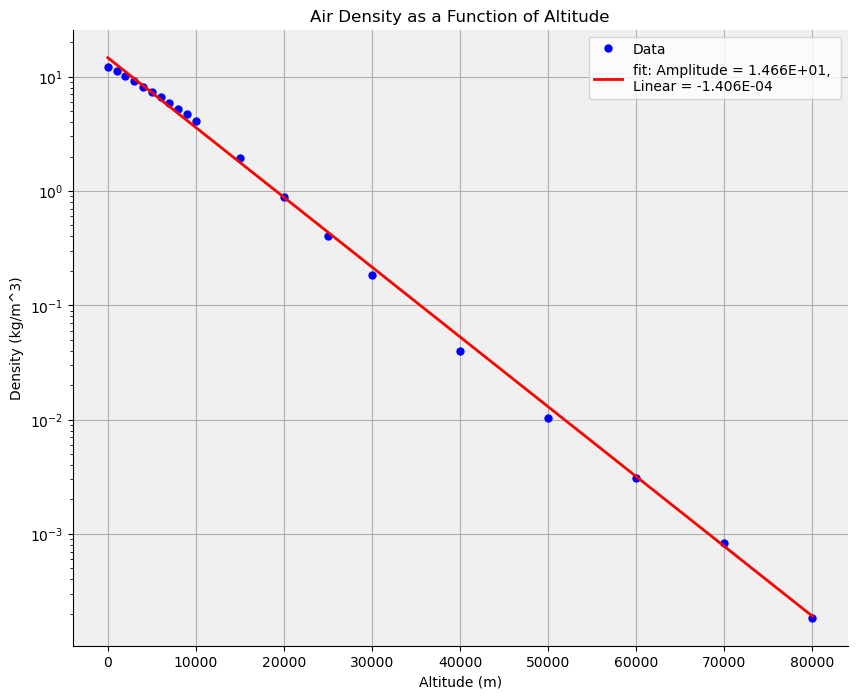

In [9]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, density, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')
if fit_type == 1:
    plt.plot(altitude,yfit,color='r', linewidth=2, label = 'fit: Amplitude = %.3E, \nLinear = %.3E' % tuple(popt))
else:
    plt.plot(altitude,yfit,color='r', linewidth=2, label = 'fit: Amplitude = %.3E, \nLinear = %.3E, \nQuadratic = %.3E' % tuple(popt))

# Set the plot title and axis labels
plt.title("Air Density as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Density (kg/m^3)")
plt.yscale("log")
plt.legend()

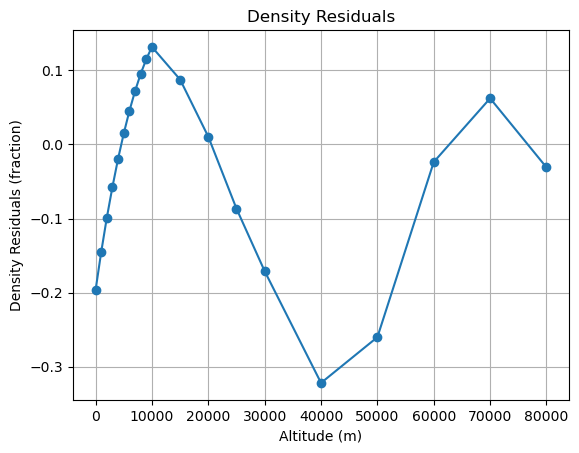

In [10]:
plt.title("Density Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Density Residuals (fraction)')
plt.grid(True)

plt.plot(altitude, (density - fitfunction(altitude, *popt))/density, 'o-')

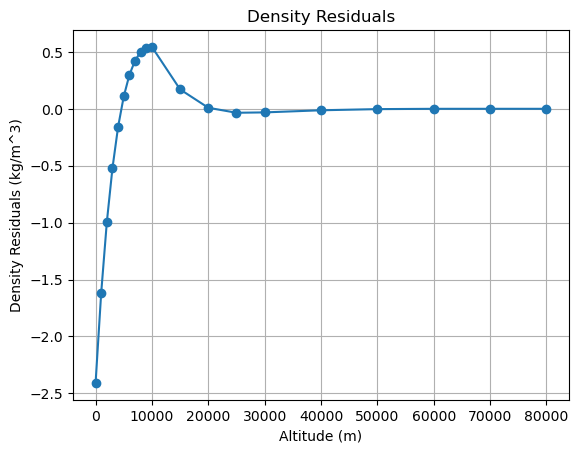

In [11]:
plt.title("Density Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Density Residuals (kg/m^3)')
plt.grid(True)

plt.plot(altitude, (density - fitfunction(altitude, *popt)), 'o-')
residuals = (density - fitfunction(altitude, *popt))
popt_exponential = popt

In [12]:
init_vals = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

def residualfunction(x,a,b,c,d,e,f,g,h):
    return a+b*np.power(np.array(x),1)+c*np.power(np.array(x),2)+d*np.power(np.array(x),3)+e*np.power(np.array(x),4)+f*np.power(np.array(x),5)+g*np.power(np.array(x),6)+h*np.power(np.array(x),7)


In [13]:
if use_errors == False:
    popt, pcov = curve_fit(residualfunction, altitude, residuals, p0=init_vals)
else:
    popt, pcov = curve_fit(residualfunction, altitude, residuals, sigma=density_uncertainty, absolute_sigma=True, p0=init_vals)

In [14]:
print (popt, pcov)

[-1.31609394e+00  4.67654494e-04 -4.81365855e-08  2.29458733e-12
 -5.87483415e-17  8.35429255e-22 -6.22491839e-27  1.89672305e-32] [[ 2.75008732e-06 -7.75559561e-10  7.41934107e-14 -3.43695260e-18
   8.69849659e-23 -1.23182361e-27  9.17134619e-33 -2.79665646e-38]
 [-7.75559561e-10  2.38092110e-13 -2.35641886e-17  1.11128483e-21
  -2.84328585e-26  4.05573551e-31 -3.03513256e-36  9.29019082e-42]
 [ 7.41934107e-14 -2.35641886e-17  2.36566999e-21 -1.12464270e-25
   2.89251629e-30 -4.14118895e-35  3.10759376e-40 -9.53213371e-46]
 [-3.43695260e-18  1.11128483e-21 -1.12464270e-25  5.37242344e-30
  -1.38634825e-34  1.98970554e-39 -1.49594137e-44  4.59556837e-50]
 [ 8.69849659e-23 -2.84328585e-26  2.89251629e-30 -1.38634825e-34
   3.58602030e-39 -5.15617486e-44  3.88231129e-49 -1.19408341e-54]
 [-1.23182361e-27  4.05573551e-31 -4.14118895e-35  1.98970554e-39
  -5.15617486e-44  7.42462107e-49 -5.59695779e-54  1.72315161e-59]
 [ 9.17134619e-33 -3.03513256e-36  3.10759376e-40 -1.49594137e-44
   3.

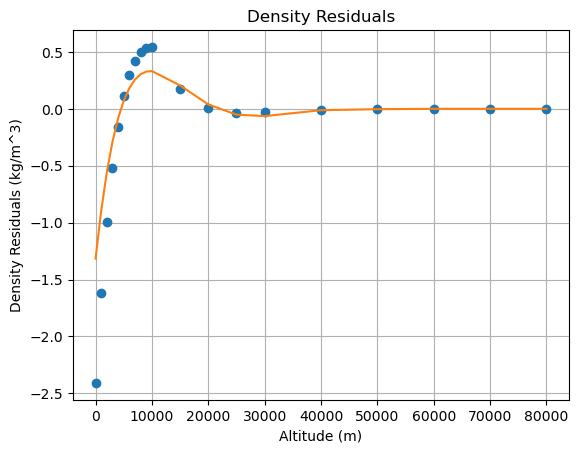

In [15]:
plt.title("Density Residuals")
plt.xlabel('Altitude (m)')
plt.ylabel('Density Residuals (kg/m^3)')
plt.grid(True)


plt.plot(altitude, residuals, 'o')
plt.plot(altitude, residualfunction(altitude, *popt), '-')

In [16]:
popt_combined = [popt_exponential[0], popt_exponential[1], popt[0], popt[1], popt[2], popt[3], popt[4], popt[5], popt[6], popt[7]]

In [17]:
def fitfunction_combined(x,a0,a1,a,b,c,d,e,f,g,h):
    return a0*np.exp(a1*np.array(x))+a+b*np.power(np.array(x),1)+c*np.power(np.array(x),2)+d*np.power(np.array(x),3)+e*np.power(np.array(x),4)+f*np.power(np.array(x),5)+g*np.power(np.array(x),6)+h*np.power(np.array(x),7)

In [18]:
init_vals = popt_combined
if use_errors == False:
    popt, pcov = curve_fit(fitfunction_combined, altitude, density, p0=init_vals)
else:
    popt, pcov = curve_fit(fitfunction_combined, altitude, density, sigma=density_uncertainty, absolute_sigma=True, p0=init_vals)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 2200.

In [ ]:
print (popt, pcov)

In [ ]:
yfit = []
chi2=0
for i in range (0,npoints):
    yfit.append(fitfunction_combined(altitude[i],*popt))
    chi2 += (density[i]-yfit[i])*(density[i]-yfit[i])
    
print ("Chi^2 / dof = %.3E / %d" % (chi2,npoints-len(init_vals)))

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Set the grid lines
ax.grid(True)

# Set the background color
ax.set_facecolor('#F0F0F0')

# Set the border properties
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set the line and marker properties
line_color = 'b'
line_width = 0
marker_color = 'b'
marker_style = 'o'
marker_size = 5

# Create the plot
plt.plot(altitude, density, color=line_color, linewidth=line_width,
         marker=marker_style, markersize=marker_size, markerfacecolor=marker_color, label='Data')

plt.plot(altitude,np.abs(yfit),color='r', linewidth=2, label = "Fit")

# Set the plot title and axis labels
plt.title("Air Density as a Function of Altitude")
plt.xlabel("Altitude (m)")
plt.ylabel("Density (kg/m^3)")
#plt.yscale("log")
plt.legend()